# Pyber


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data=pd.read_csv("data/city_data.csv")
ride_data=pd.read_csv("data/ride_data.csv")

In [3]:
# Combine the data into a single dataset
joined_data = pd.merge(city_data,ride_data, on="city")
# Display the data table for preview
joined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

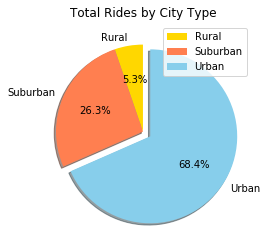

In [15]:
total_rides=joined_data.groupby(['type'])['fare'].count()
c=['gold','coral','skyblue']
labels=['Rural','Suburban','Urban']
explode=[0,0,0.1]
fig1, ax1 = plt.subplots()
ax1.pie(total_rides, explode=explode, labels=labels, colors=c, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Total Rides by City Type')
ax1.legend()

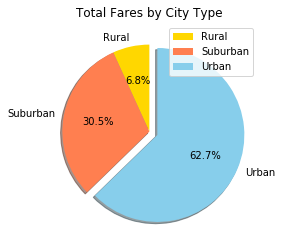

In [14]:
total_fares=joined_data.groupby(['type'])['fare'].sum()
c=['gold','coral','skyblue']
labels=['Rural','Suburban','Urban']
explode=[0,0,0.1]
fig1, ax1 = plt.subplots()
ax1.pie(total_fares, explode=explode, labels=labels, colors=c, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Total Fares by City Type')
ax1.legend()

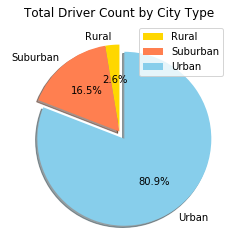

In [11]:
total_drivers=city_data.groupby(['type'])['driver_count'].sum()
c=['gold','coral','skyblue']
labels=['Rural','Suburban','Urban']
explode=[0,0,0.1]
fig1, ax1 = plt.subplots()
ax1.pie(total_drivers, explode=explode, labels=labels, colors=c, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Total Driver Count by City Type')
ax1.legend()

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)


In [16]:
#Data for bubble plot
average_fare = pd.DataFrame(joined_data.groupby(['city'])['fare'].mean()).rename(columns={'fare':'avg_fare'})
total_rides=pd.DataFrame(joined_data.groupby(['city'])['fare'].count()).rename(columns={'fare':'total_rides'})
drivers_city = pd.DataFrame(city_data[['city','driver_count','type']])
bubble_df=pd.merge(average_fare, total_rides, how='left',on='city')
bubble_df=pd.merge(bubble_df,drivers_city,on='city')
bubble_df.head()

,city,avg_fare,total_rides,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


In [17]:
#map colors to city type
colors = {'Urban':'skyblue','Suburban':'coral','Rural':'gold'}
c=bubble_df['type'].apply(lambda x: colors[x])

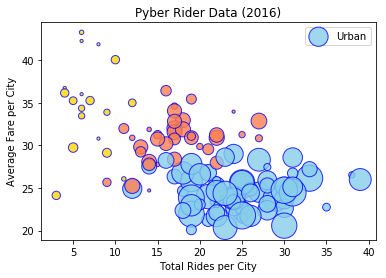

In [24]:
#x-axis as total rides
#y-axis as avg fare
#size as driver count
x = bubble_df['total_rides']
y = bubble_df['avg_fare']
z = bubble_df['driver_count']
labels=bubble_df['type']
fig, ax = plt.subplots()
scatter = ax.scatter(x,y,z*10,c=c,alpha=0.80,linewidths=1, edgecolor='b')

plt.title('Pyber Rider Data (2016)')
plt.xlabel('Total Rides per City')
plt.ylabel('Average Fare per City')
ax.legend(labels=labels) #unfortunately i couldn't figure this part out
plt.show()

Observations:
* It's no surprise that cities with higher driver counts also have a higher number of total rides. Therefore it's clear that the rural areas would have the fewest total rides. 
* From the pie chart, while rural areas have 2.8% of the total driver count, the total fares in those cities account for 6.8%. This makes sense as the bubble graph illustrates that the rural areas have the highest average fares. 
* The more drivers are in a city, the lower the average fare in the city, potentially due to higerh competition among drivers or shorter distances traveled in more urban areas.
* It would be interesting to get data about the mileage for each of the fares and allow for another dimension of comparison.